In [1]:
#Codigo Criado por Luiz Eduardo Soares Emidio da Silva durante o desenvolvimento de um PIBIC 
from __future__ import print_function

import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
from keras import regularizers
from keras.models import Model

from keras import backend as K 
K.set_learning_phase(1)

import matplotlib.pyplot as plt
import matplotlib.style as sty

from sklearn.metrics import confusion_matrix
import numpy as np
import itertools

import os
import random as rn
import seaborn as sns

import tensorflow as tf



/usr/local/lib/python3.7/dist-packages/keras/backend.py:400: UserWarning: `tf.keras.backend.set_learning_phase` is deprecated and will be removed after 2020-10-11. To update it, simply pass a True/False value to the `training` argument of the `__call__` method of your layer or model.
  warnings.warn('`tf.keras.backend.set_learning_phase` is deprecated and '


In [2]:
#Configurações Arbritarias escolhidas para treinamento
batch_size = 64
num_classes = 10
epochs = 50

#Cada imagem do MNIST tem o tamanho de 28 por 28 pixels
img_rows, img_cols = 28, 28

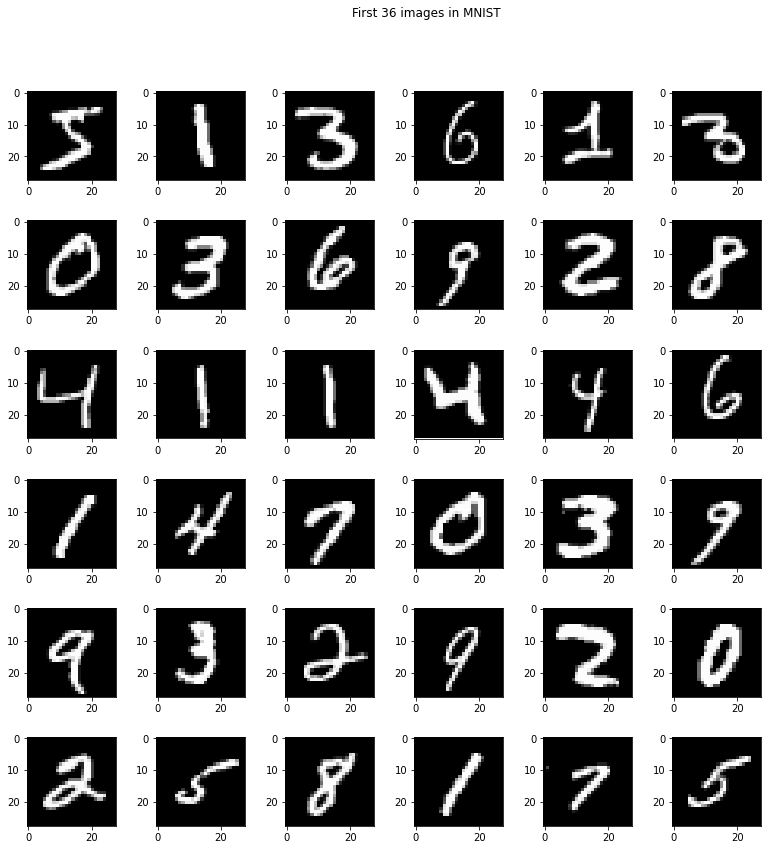

In [3]:
#Carregando imagens e plotando alguns exemplos 
(x_train, y_train), (x_test, y_test) = mnist.load_data()
 
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train  /= 255.0
x_test /= 255.0

# plot first 36 images in MNIST
fig, ax = plt.subplots(6, 6, figsize = (12, 12))
fig.suptitle('First 36 images in MNIST')
fig.tight_layout(pad = 0.3, rect = [0, 0, 0.9, 0.9])
for x, y in [(i, j) for i in range(6) for j in range(6)]:
    ax[x, y].imshow(x_train[x + y * 6].reshape((28, 28)), cmap = 'gray')
#    ax[x, y].set_title(y_train[x + y * 6])


In [4]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [5]:
#Inserir estrutura da CNN nessa parte do codigo
model=Sequential()

model.add(Conv2D(28, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4), input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(28, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(64, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(Conv2D(128, (3,3), padding='same', kernel_regularizer=regularizers.l2(1e-4)))
model.add(Activation('relu'))
model.add(BatchNormalization())

model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 28)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        7084      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 28)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0

In [6]:
# Compilar a CNN
model.compile(loss=keras.losses.categorical_crossentropy, optimizer=keras.optimizers.Adadelta(), metrics=['accuracy'] )


In [7]:
# Imprimir a topologia
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 28)        280       
_________________________________________________________________
activation (Activation)      (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 28, 28, 28)        112       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 28, 28, 28)        7084      
_________________________________________________________________
activation_1 (Activation)    (None, 28, 28, 28)        0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 28, 28, 28)        112       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 28)        0

In [8]:
# Treinar a CNN
es=EarlyStopping(monitor='val_loss', mode='min', verbose=1)
results=model.fit(x_train, y_train,
                  batch_size=batch_size,
                  epochs=50,
                  verbose=1,
                  validation_split=0.2)

Epoch 1/50
750/750 [==============================] - 25s 10ms/step - loss: 4.2246 - accuracy: 0.0938 - val_loss: 2.1824 - val_accuracy: 0.2470
Epoch 2/50
750/750 [==============================] - 6s 9ms/step - loss: 3.0822 - accuracy: 0.1544 - val_loss: 1.7991 - val_accuracy: 0.4062
Epoch 3/50
750/750 [==============================] - 7s 9ms/step - loss: 2.6745 - accuracy: 0.2194 - val_loss: 1.5080 - val_accuracy: 0.5226
Epoch 4/50
750/750 [==============================] - 7s 10ms/step - loss: 2.3127 - accuracy: 0.3043 - val_loss: 1.2990 - val_accuracy: 0.5947
Epoch 5/50
750/750 [==============================] - 7s 9ms/step - loss: 2.0452 - accuracy: 0.3678 - val_loss: 1.1265 - val_accuracy: 0.6537
Epoch 6/50
750/750 [==============================] - 7s 9ms/step - loss: 1.8380 - accuracy: 0.4198 - val_loss: 0.9897 - val_accuracy: 0.6952
Epoch 7/50
750/750 [==============================] - 7s 9ms/step - loss: 1.6231 - accuracy: 0.4794 - val_loss: 0.8770 - val_accuracy: 0.7317
Epo

In [9]:
# Executar a avaliação (teste)
score=model.evaluate(x_test, y_test, verbose=0)
print('Test loss: ', score[0])
print('Test accuracy: ', score[1])

Test loss:  0.1594417542219162
Test accuracy:  0.9587000012397766


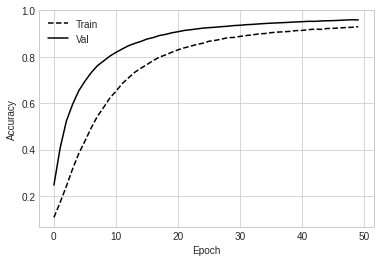

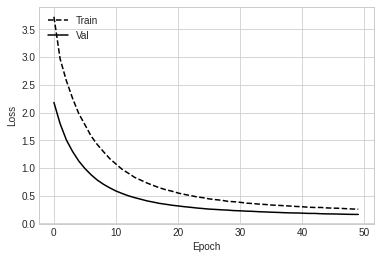

In [10]:
# Plotar o grafico do histórico de evolução do treinamento
sty.use('seaborn-whitegrid')
plt.plot(results.history['accuracy'],'k--')
plt.plot(results.history['val_accuracy'],'k')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()

# Plota o grafico do histórico de evolução da taxa de perda da rede 
plt.plot(results.history['loss'],'k--')
plt.plot(results.history['val_loss'],'k')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'], loc='upper left')
plt.show()


In [11]:
# Plotar a matrix de confusão 
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title=None,
                          cmap=plt.cm.Blues):
  plt.imshow(cm, interpolation = 'nearest',cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation = 45)
  plt.yticks(tick_marks, classes)
  
  if normalize:
    cm = cm.astype('float')/cm.sum(axis=1)[:,np.newaxis]
    print("Normalized confusion matrix")
  else:
    print("Confusion matrix, without normalization")
  
  print(cm)
  
  thresh = cm.max()/2
  for i, j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
    plt.text(j, i, cm[i,j], horizontalalignment="center", color="white" if cm[i,j]>thresh else "black")
   
  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')

In [12]:
# Predição da CNN
y_predict=np.argmax(model.predict(x_test), axis=1)

# Preparar Matriz de Confusão
cm=confusion_matrix(np.argmax(y_test, axis=1), y_predict)

Confusion matrix, without normalization
[[ 965    2    1    0    0    0    3    1    1    7]
 [   0 1126    2    2    0    0    4    0    1    0]
 [   9    2  962   12    3    0    6   23   12    3]
 [   0    0    2  974    0    6    0    4    8   16]
 [   0    3    1    0  938    0    7    0    1   32]
 [   5    0    1   17    0  836    9    1   10   13]
 [  11    5    0    0    2    1  936    0    2    1]
 [   0    6   10    7    0    0    0  951    3   51]
 [  13    4    1    4    1    0    3    7  914   27]
 [   4    5    0    6    3    0    0    5    1  985]]


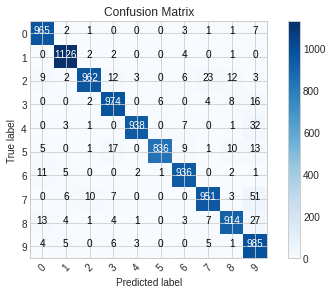

In [13]:
# Chamada da matriz confusão
cm_plot_labels=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
plot_confusion_matrix(cm, cm_plot_labels, title= 'Confusion Matrix')


In [14]:
# Salvando o modelo, a arquitetura da CNN
model_json = model.to_json()
with open("cnn.json", "w") as json_file:
  json_file.write(model_json)

# Salvando os pesos da CNN
model.save_weights("cnn_weights.h5")

In [15]:
# Exemplo de como carregar a usar modelo salvo.

from keras.models import model_from_json

# Carregando o modelo
json_file=open("cnn.json", "r")
cnn_json=json_file.read()
json_file.close()

cnn_model=model_from_json(cnn_json)

# Carregando os pesos
cnn_model.load_weights("cnn_weights.h5")

# Predição usando o modelo carregado
y_predict=np.argmax(cnn_model.predict(x_test), axis=1)
print(y_predict)
y=np.argmax(y_test, axis=1)
print(y)

# Predição usando apenas uma imagem
exemplo=x_test[2]
exemplo = exemplo.reshape(1, 28, 28, 1)
saida=cnn_model.predict(exemplo)
classe=np.argmax(saida, axis=1)
print(classe)

[7 2 1 ... 4 5 6]
[7 2 1 ... 4 5 6]
[1]


Classe predita: [8] rótulo: 3 Score:  0.76538986


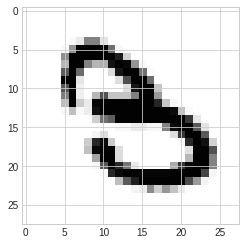

Classe predita: [9] rótulo: 7 Score:  0.57994705


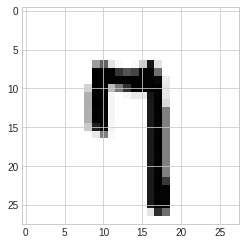

Classe predita: [9] rótulo: 8 Score:  0.6569152


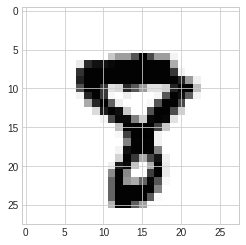

Classe predita: [1] rótulo: 8 Score:  0.56438565


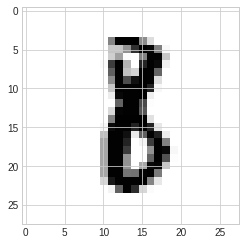

Classe predita: [0] rótulo: 6 Score:  0.93500453


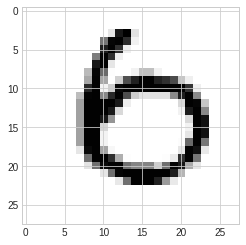

Classe predita: [0] rótulo: 8 Score:  0.5890757


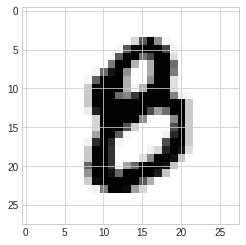

Classe predita: [3] rótulo: 2 Score:  0.97549766


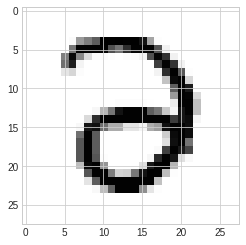

Classe predita: [7] rótulo: 9 Score:  0.56170636


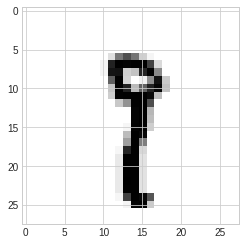

Classe predita: [7] rótulo: 2 Score:  0.99768865


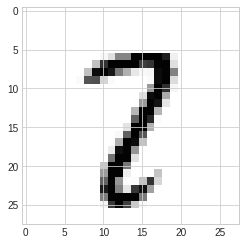

Classe predita: [3] rótulo: 5 Score:  0.62682945


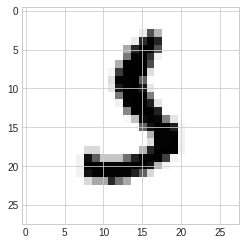

Classe predita: [7] rótulo: 2 Score:  0.75552046


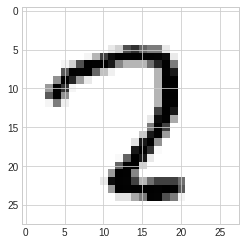

Classe predita: [9] rótulo: 8 Score:  0.8423378


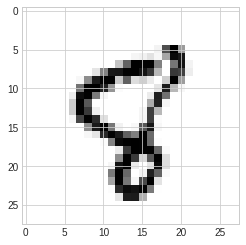

Classe predita: [0] rótulo: 5 Score:  0.53396845


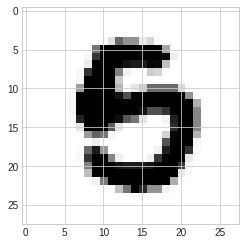

Classe predita: [3] rótulo: 5 Score:  0.40927482


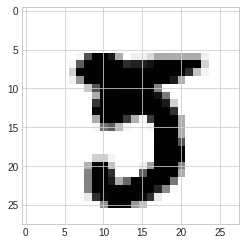

Classe predita: [0] rótulo: 6 Score:  0.5849219


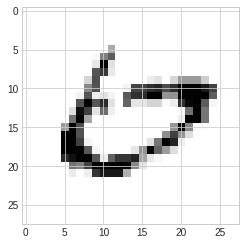

Classe predita: [6] rótulo: 5 Score:  0.5694241


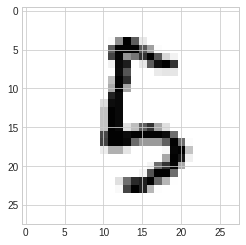

Classe predita: [0] rótulo: 8 Score:  0.78914315


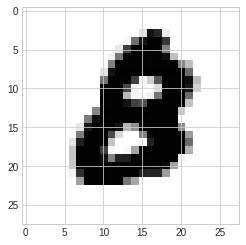

Classe predita: [1] rótulo: 4 Score:  0.46722603


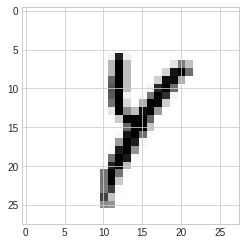

Classe predita: [9] rótulo: 8 Score:  0.5567304


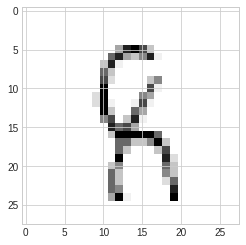

Classe predita: [9] rótulo: 7 Score:  0.52112836


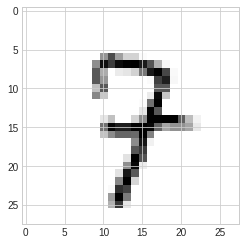

Classe predita: [9] rótulo: 4 Score:  0.8082353


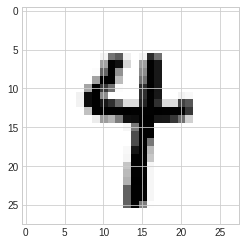

Classe predita: [9] rótulo: 4 Score:  0.94218206


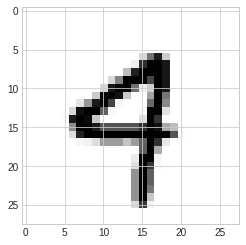

Classe predita: [2] rótulo: 8 Score:  0.55075574


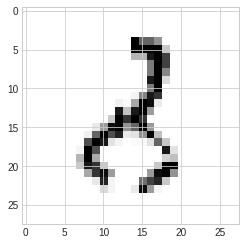

Classe predita: [3] rótulo: 2 Score:  0.60570574


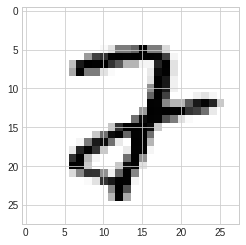

Classe predita: [3] rótulo: 8 Score:  0.4728044


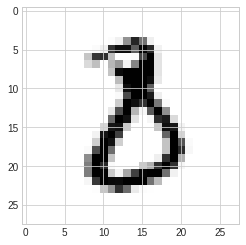

Classe predita: [8] rótulo: 2 Score:  0.89957994


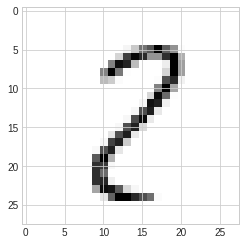

Classe predita: [8] rótulo: 1 Score:  0.53457814


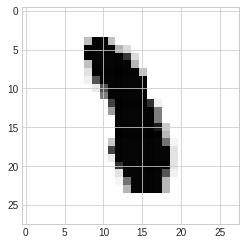

Classe predita: [9] rótulo: 3 Score:  0.6797817


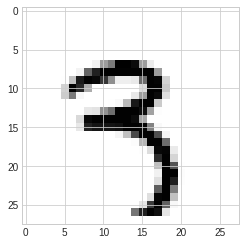

Classe predita: [6] rótulo: 2 Score:  0.8785906


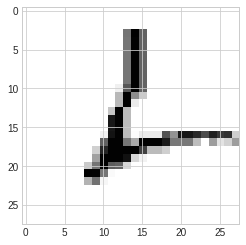

Classe predita: [8] rótulo: 2 Score:  0.39842153


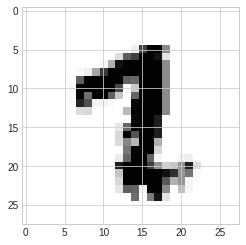

Classe predita: [3] rótulo: 7 Score:  0.9008342


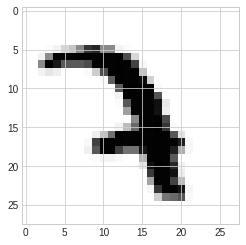

Classe predita: [9] rótulo: 7 Score:  0.92207927


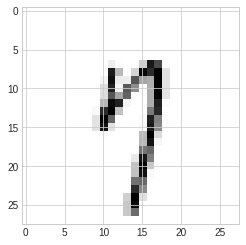

Classe predita: [6] rótulo: 0 Score:  0.9234556


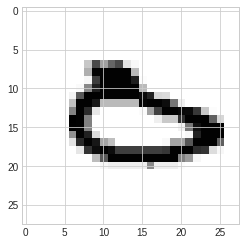

Classe predita: [8] rótulo: 5 Score:  0.9758346


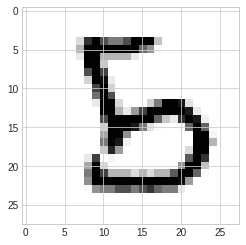

Classe predita: [9] rótulo: 7 Score:  0.4543009


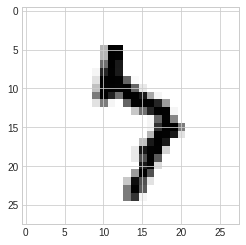

Classe predita: [9] rótulo: 4 Score:  0.95969164


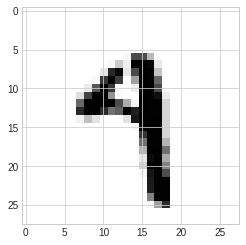

Classe predita: [0] rótulo: 8 Score:  0.9090803


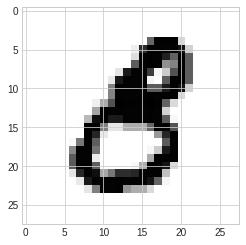

Classe predita: [7] rótulo: 8 Score:  0.602293


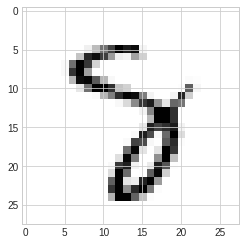

Classe predita: [9] rótulo: 7 Score:  0.7565265


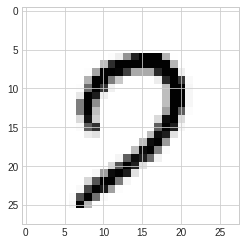

Classe predita: [9] rótulo: 4 Score:  0.75798297


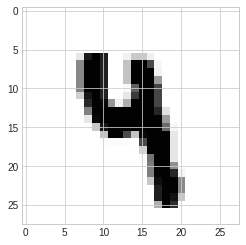

Classe predita: [7] rótulo: 2 Score:  0.95198953


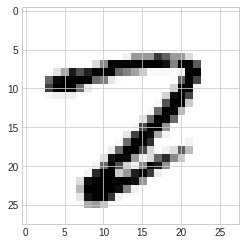

Classe predita: [8] rótulo: 2 Score:  0.6454824


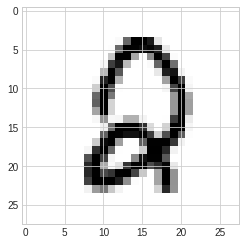

Classe predita: [9] rótulo: 8 Score:  0.9743077


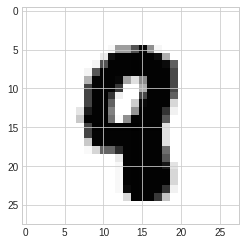

Classe predita: [6] rótulo: 1 Score:  0.6285687


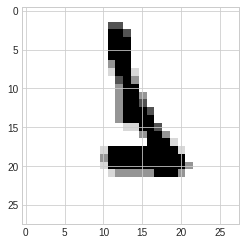

Classe predita: [9] rótulo: 7 Score:  0.63051087


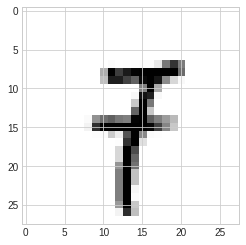

Classe predita: [0] rótulo: 6 Score:  0.9932116


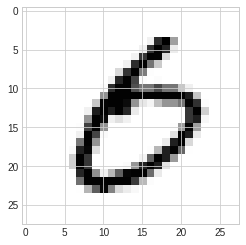

Classe predita: [9] rótulo: 8 Score:  0.5474723


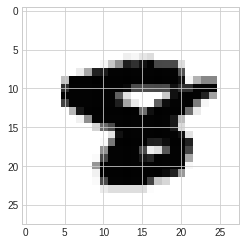

Classe predita: [9] rótulo: 7 Score:  0.8059244


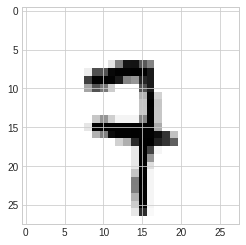

Classe predita: [5] rótulo: 6 Score:  0.79970044


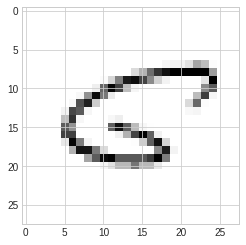

Classe predita: [9] rótulo: 5 Score:  0.54821056


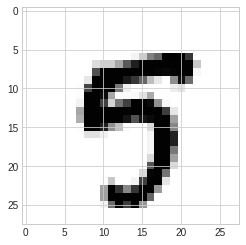

Classe predita: [1] rótulo: 8 Score:  0.6238957


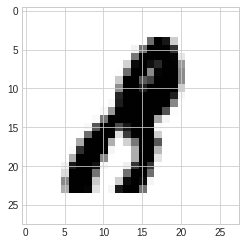

Classe predita: [3] rótulo: 7 Score:  0.47339824


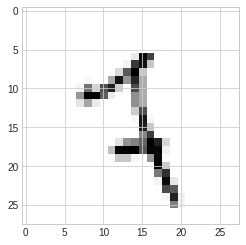

Classe predita: [9] rótulo: 3 Score:  0.6673806


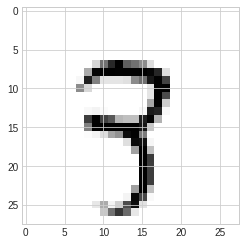

Classe predita: [6] rótulo: 4 Score:  0.71174085


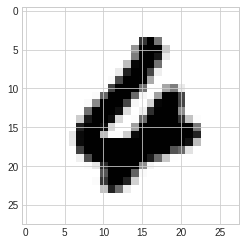

Classe predita: [8] rótulo: 3 Score:  0.8977637


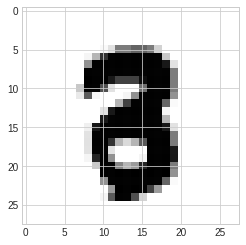

Classe predita: [9] rótulo: 8 Score:  0.6751242


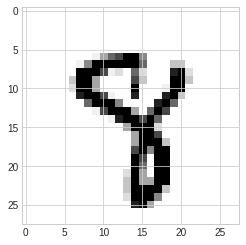

Classe predita: [8] rótulo: 7 Score:  0.5024471


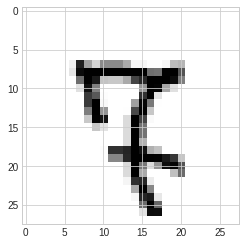

Classe predita: [9] rótulo: 7 Score:  0.81375986


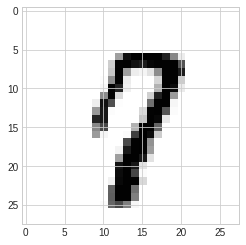

Classe predita: [1] rótulo: 6 Score:  0.8396078


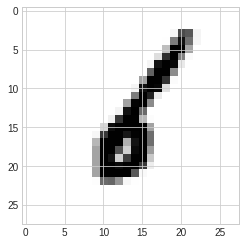

Classe predita: [9] rótulo: 0 Score:  0.58550537


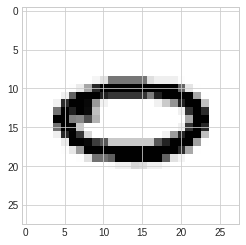

Classe predita: [9] rótulo: 3 Score:  0.8929506


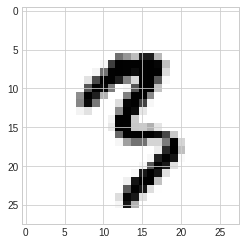

Classe predita: [6] rótulo: 2 Score:  0.53670174


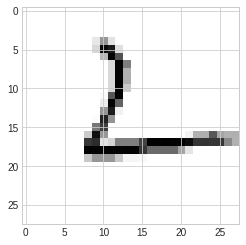

Classe predita: [2] rótulo: 7 Score:  0.83814394


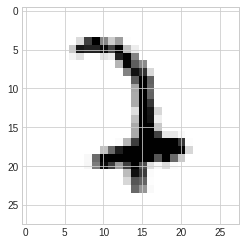

Classe predita: [4] rótulo: 9 Score:  0.6041003


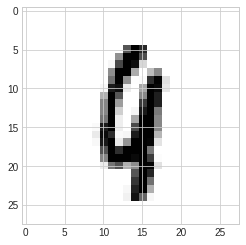

Classe predita: [9] rótulo: 4 Score:  0.6036506


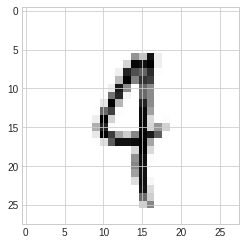

Classe predita: [6] rótulo: 5 Score:  0.5832224


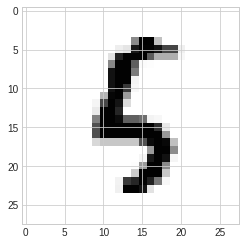

Classe predita: [3] rótulo: 9 Score:  0.48578212


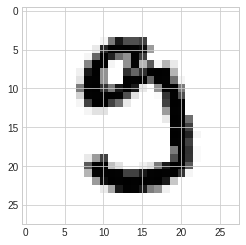

Classe predita: [7] rótulo: 2 Score:  0.5466775


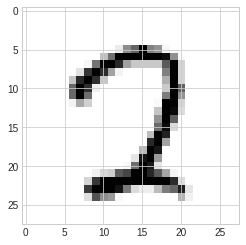

Classe predita: [1] rótulo: 7 Score:  0.7692773


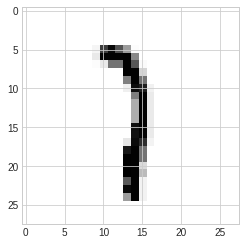

Classe predita: [9] rótulo: 4 Score:  0.8760402


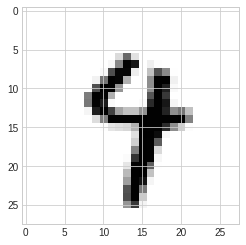

Classe predita: [2] rótulo: 7 Score:  0.62352586


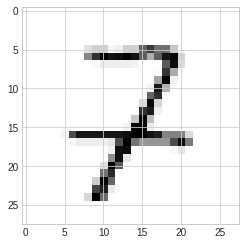

Classe predita: [9] rótulo: 5 Score:  0.76052076


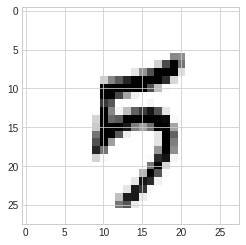

Classe predita: [7] rótulo: 5 Score:  0.96587366


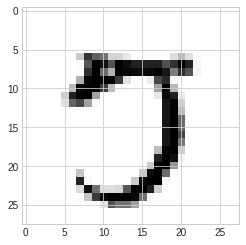

Classe predita: [3] rótulo: 8 Score:  0.51467454


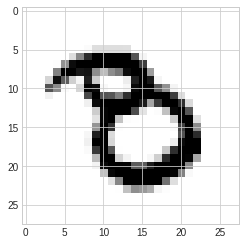

Classe predita: [1] rótulo: 7 Score:  0.55268097


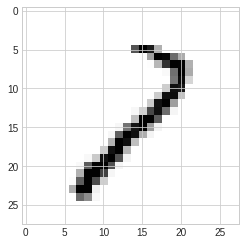

Classe predita: [6] rótulo: 2 Score:  0.90503925


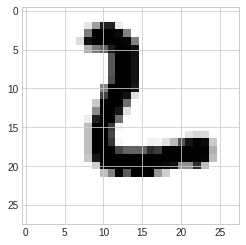

Classe predita: [6] rótulo: 5 Score:  0.92749774


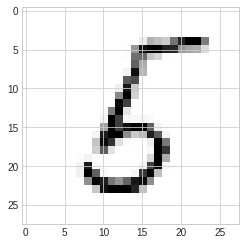

Classe predita: [3] rótulo: 5 Score:  0.9886811


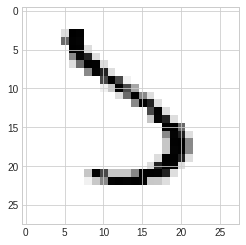

Classe predita: [0] rótulo: 6 Score:  0.7147095


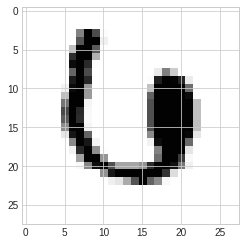

Classe predita: [9] rótulo: 4 Score:  0.6366791


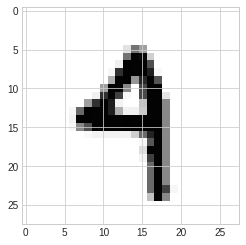

Classe predita: [3] rótulo: 8 Score:  0.69035333


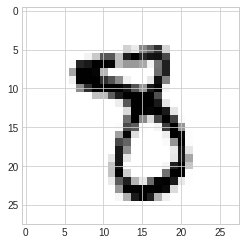

Classe predita: [3] rótulo: 5 Score:  0.5281385


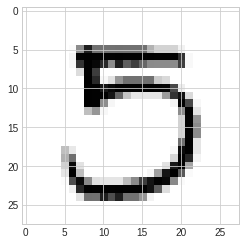

Classe predita: [1] rótulo: 7 Score:  0.7304576


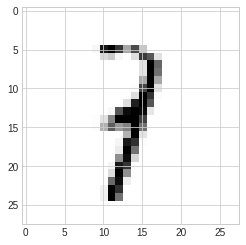

Classe predita: [9] rótulo: 7 Score:  0.7698204


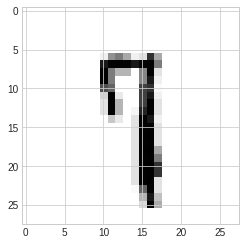

Classe predita: [6] rótulo: 1 Score:  0.8166519


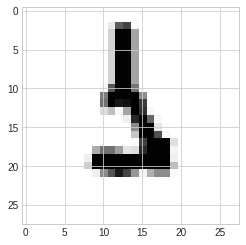

Classe predita: [7] rótulo: 8 Score:  0.9239211


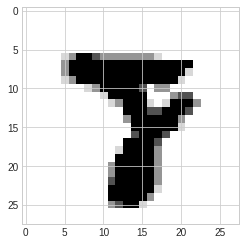

Classe predita: [6] rótulo: 4 Score:  0.83297634


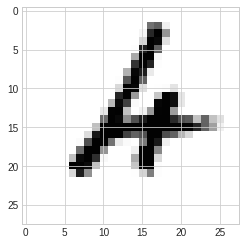

Classe predita: [8] rótulo: 9 Score:  0.85224473


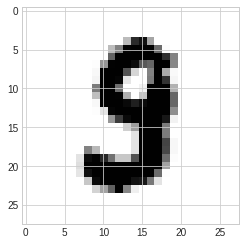

Classe predita: [4] rótulo: 6 Score:  0.5589834


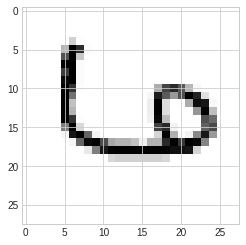

Classe predita: [9] rótulo: 7 Score:  0.57834136


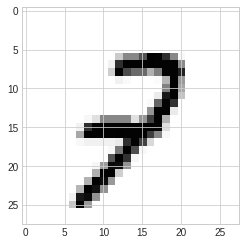

Classe predita: [9] rótulo: 4 Score:  0.49486703


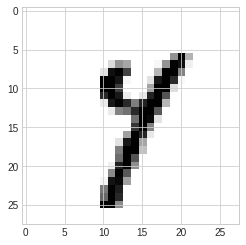

Classe predita: [6] rótulo: 2 Score:  0.61403847


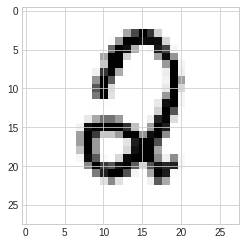

Classe predita: [3] rótulo: 2 Score:  0.4855221


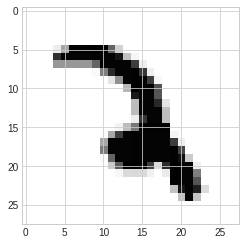

Classe predita: [0] rótulo: 2 Score:  0.7638851


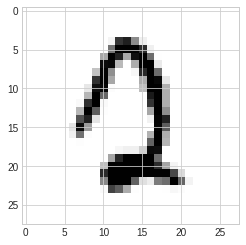

Classe predita: [7] rótulo: 3 Score:  0.99854314


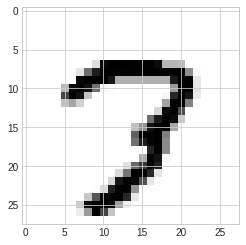

Classe predita: [1] rótulo: 7 Score:  0.8393211


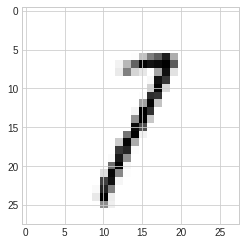

Classe predita: [0] rótulo: 8 Score:  0.94543695


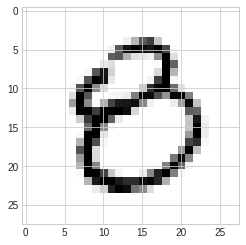

Classe predita: [9] rótulo: 7 Score:  0.7172021


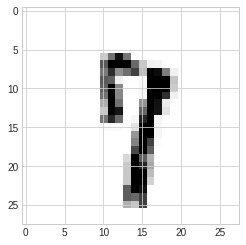

Classe predita: [2] rótulo: 5 Score:  0.3204859


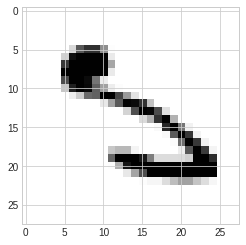

Classe predita: [2] rótulo: 7 Score:  0.8708889


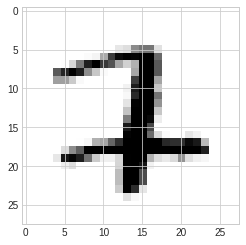

Classe predita: [9] rótulo: 2 Score:  0.4498745


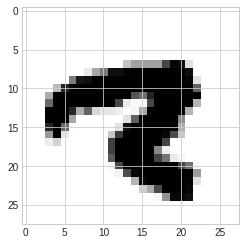

Classe predita: [9] rótulo: 6 Score:  0.682338


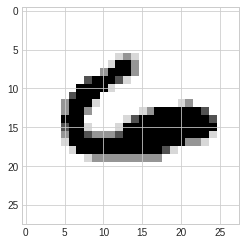

Classe predita: [7] rótulo: 8 Score:  0.9240738


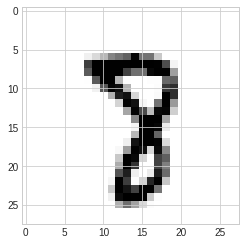

Classe predita: [9] rótulo: 7 Score:  0.5762762


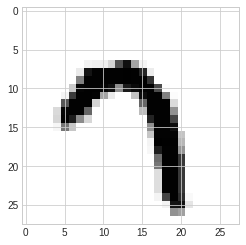

Classe predita: [4] rótulo: 9 Score:  0.91445637


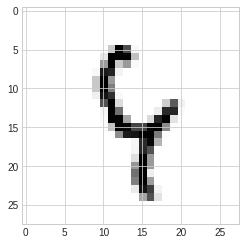

Classe predita: [0] rótulo: 2 Score:  0.9624493


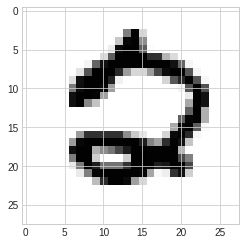

Classe predita: [2] rótulo: 7 Score:  0.89806


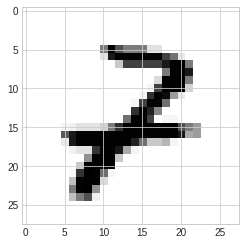

Classe predita: [9] rótulo: 7 Score:  0.7135053


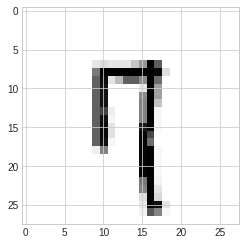

Classe predita: [3] rótulo: 5 Score:  0.9278122


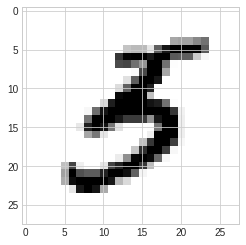

Classe predita: [8] rótulo: 4 Score:  0.37011448


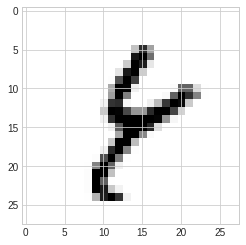

Classe predita: [7] rótulo: 2 Score:  0.9046102


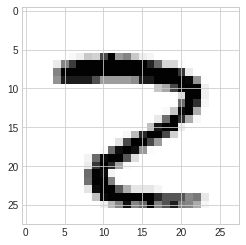

Classe predita: [9] rótulo: 4 Score:  0.9027417


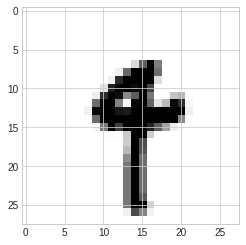

Classe predita: [9] rótulo: 7 Score:  0.9573975


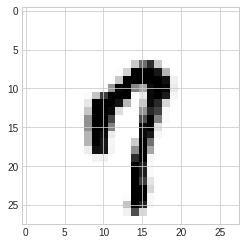

Classe predita: [0] rótulo: 5 Score:  0.46951798


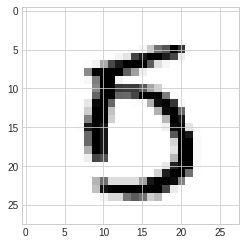

Classe predita: [0] rótulo: 2 Score:  0.9283338


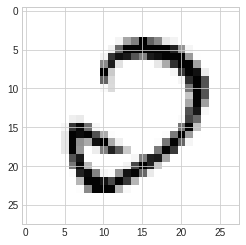

Classe predita: [9] rótulo: 3 Score:  0.7123362


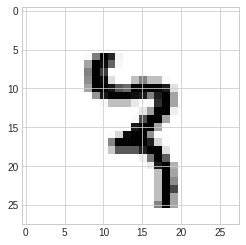

Classe predita: [0] rótulo: 6 Score:  0.9186222


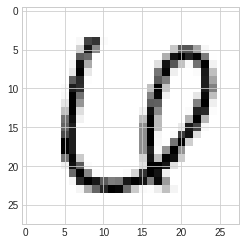

Classe predita: [9] rótulo: 5 Score:  0.6900367


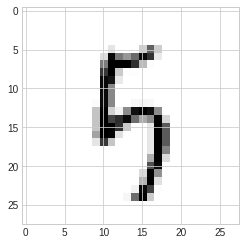

Classe predita: [9] rótulo: 4 Score:  0.98697215


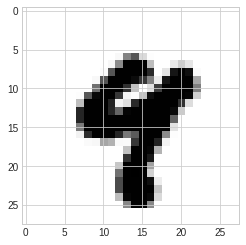

Classe predita: [1] rótulo: 6 Score:  0.99085075


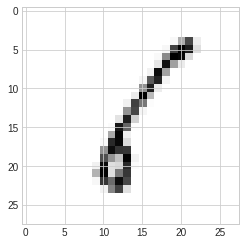

Classe predita: [9] rótulo: 4 Score:  0.8849991


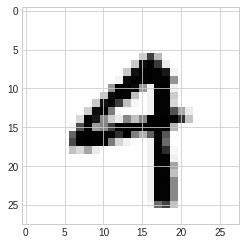

Classe predita: [2] rótulo: 1 Score:  0.7874614


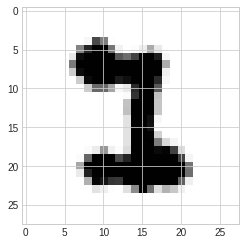

Classe predita: [1] rótulo: 0 Score:  0.4801658


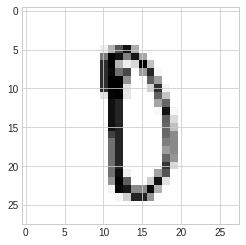

Classe predita: [3] rótulo: 2 Score:  0.9267525


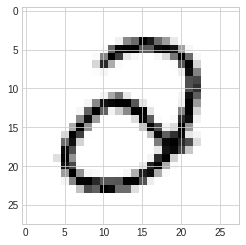

Classe predita: [1] rótulo: 9 Score:  0.887161


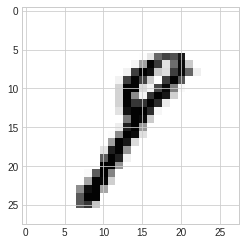

Classe predita: [8] rótulo: 5 Score:  0.71232253


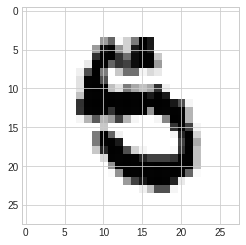

Classe predita: [8] rótulo: 5 Score:  0.5403481


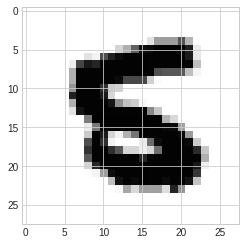

Classe predita: [6] rótulo: 1 Score:  0.6257552


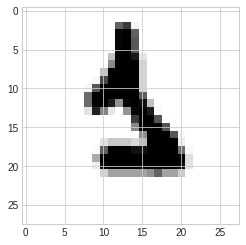

Classe predita: [0] rótulo: 8 Score:  0.48948684


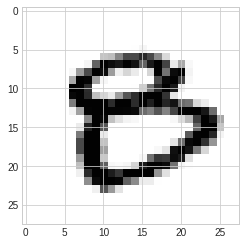

Classe predita: [3] rótulo: 5 Score:  0.4230222


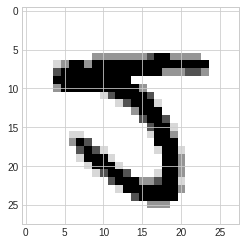

Classe predita: [0] rótulo: 9 Score:  0.5473808


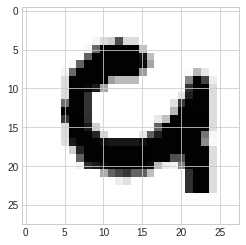

Classe predita: [7] rótulo: 2 Score:  0.9303231


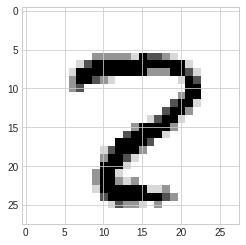

Classe predita: [3] rótulo: 7 Score:  0.43860668


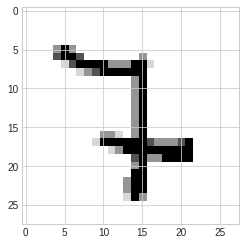

Classe predita: [6] rótulo: 1 Score:  0.5100735


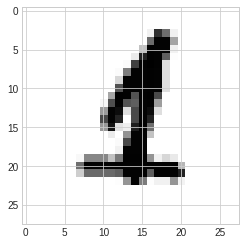

Classe predita: [9] rótulo: 5 Score:  0.6410245


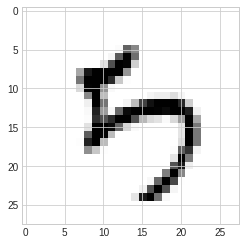

Classe predita: [9] rótulo: 4 Score:  0.8347264


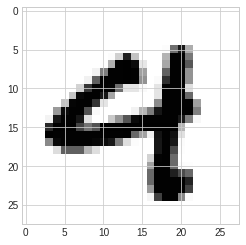

Classe predita: [1] rótulo: 9 Score:  0.63387424


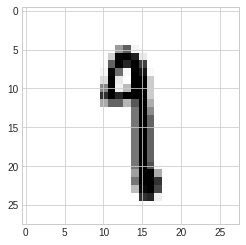

Classe predita: [9] rótulo: 4 Score:  0.5559771


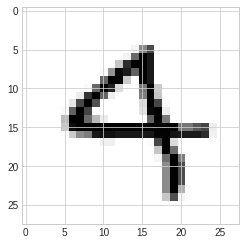

Classe predita: [0] rótulo: 8 Score:  0.6441618


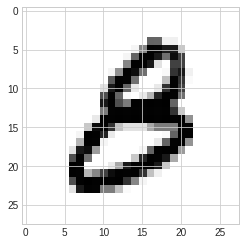

Classe predita: [1] rótulo: 9 Score:  0.9369145


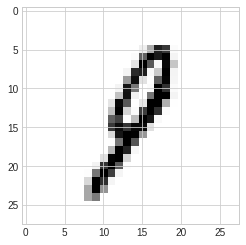

Classe predita: [9] rótulo: 3 Score:  0.5797916


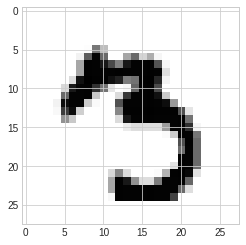

Classe predita: [8] rótulo: 6 Score:  0.4482458


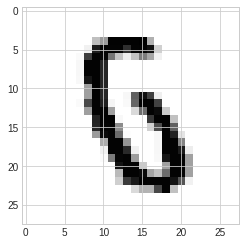

Classe predita: [0] rótulo: 2 Score:  0.9837646


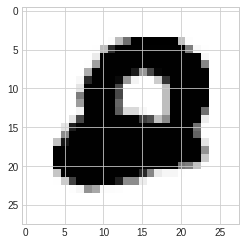

Classe predita: [8] rótulo: 2 Score:  0.31703696


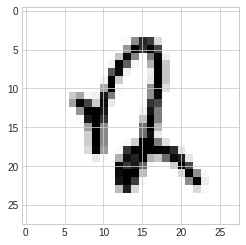

Classe predita: [1] rótulo: 6 Score:  0.64540756


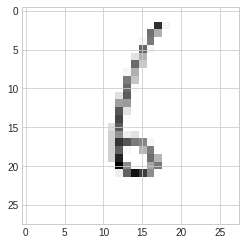

Classe predita: [8] rótulo: 5 Score:  0.41179726


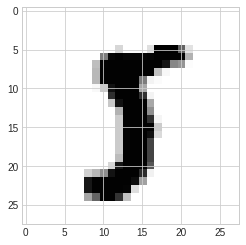

Classe predita: [3] rótulo: 5 Score:  0.47151425


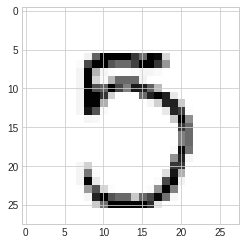

Classe predita: [3] rótulo: 5 Score:  0.64258546


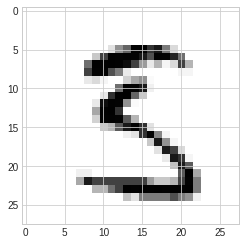

Classe predita: [8] rótulo: 7 Score:  0.3703191


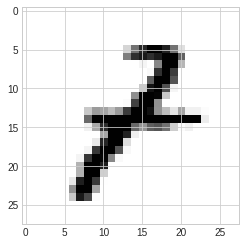

Classe predita: [1] rótulo: 6 Score:  0.5143527


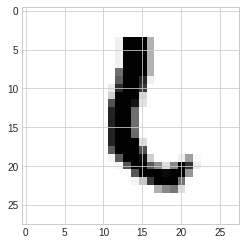

Classe predita: [7] rótulo: 3 Score:  0.40126705


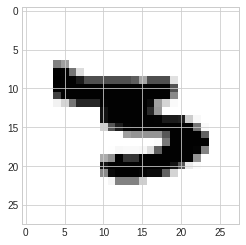

Classe predita: [3] rótulo: 2 Score:  0.9915393


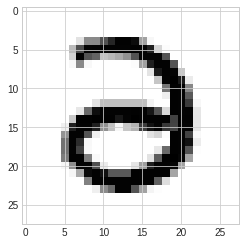

Classe predita: [9] rótulo: 4 Score:  0.60480595


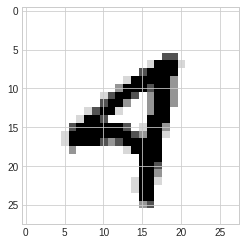

Classe predita: [3] rótulo: 5 Score:  0.5588672


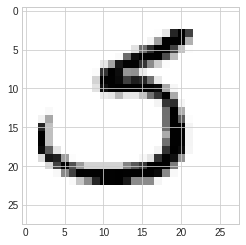

Classe predita: [0] rótulo: 8 Score:  0.6377083


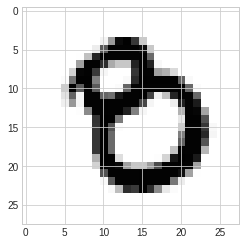

Classe predita: [9] rótulo: 4 Score:  0.5286264


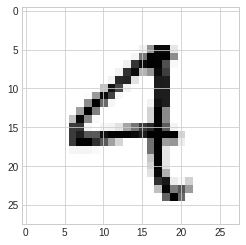

Classe predita: [2] rótulo: 3 Score:  0.4781216


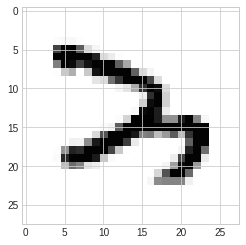

Classe predita: [5] rótulo: 3 Score:  0.6140256


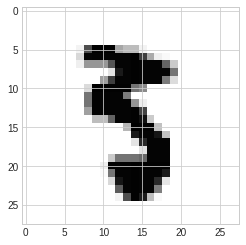

Classe predita: [3] rótulo: 5 Score:  0.8532807


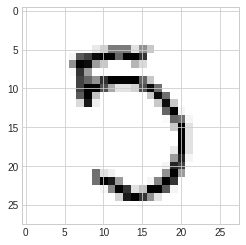

Classe predita: [9] rótulo: 8 Score:  0.70976394


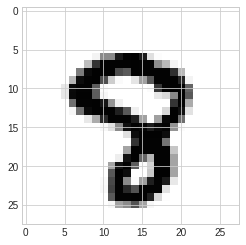

Classe predita: [8] rótulo: 6 Score:  0.48429894


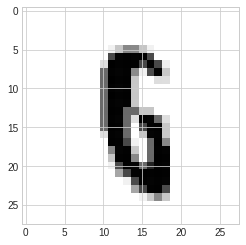

Classe predita: [1] rótulo: 9 Score:  0.39277294


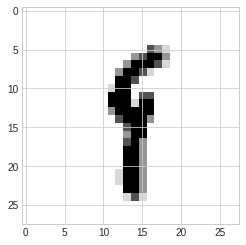

Classe predita: [9] rótulo: 7 Score:  0.6618907


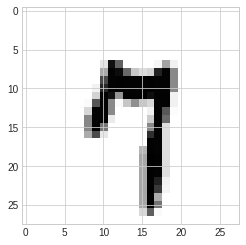

Classe predita: [7] rótulo: 9 Score:  0.52137095


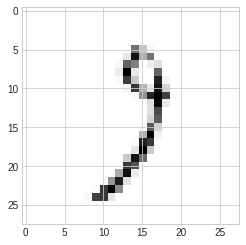

Classe predita: [2] rótulo: 1 Score:  0.9801174


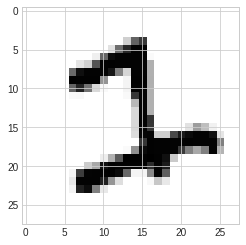

Classe predita: [3] rótulo: 5 Score:  0.70583457


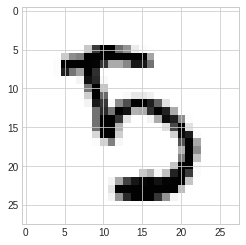

Classe predita: [3] rótulo: 5 Score:  0.72729516


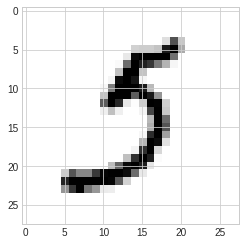

Classe predita: [9] rótulo: 5 Score:  0.49367276


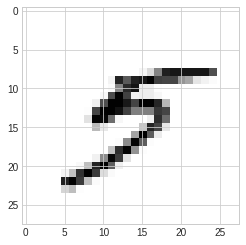

Classe predita: [9] rótulo: 5 Score:  0.96136177


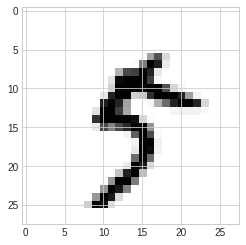

Classe predita: [0] rótulo: 6 Score:  0.9527765


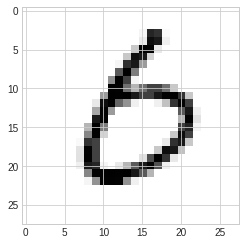

Classe predita: [9] rótulo: 4 Score:  0.5399442


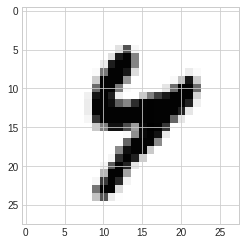

Classe predita: [9] rótulo: 5 Score:  0.66797775


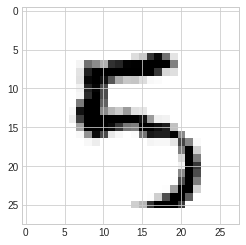

Classe predita: [9] rótulo: 3 Score:  0.6580095


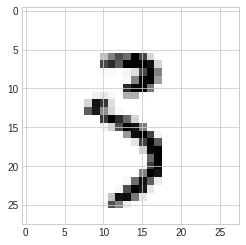

Classe predita: [3] rótulo: 8 Score:  0.90767354


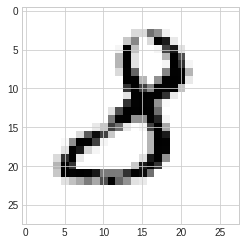

Classe predita: [1] rótulo: 7 Score:  0.759798


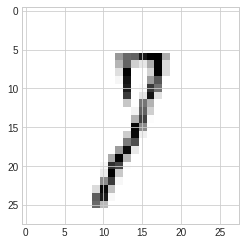

Classe predita: [9] rótulo: 0 Score:  0.69267327


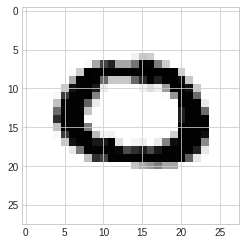

Classe predita: [0] rótulo: 6 Score:  0.5593143


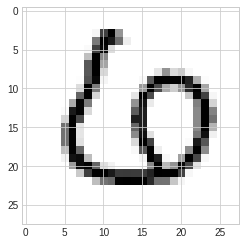

Classe predita: [9] rótulo: 4 Score:  0.6813735


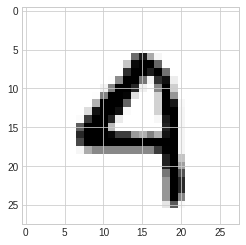

Classe predita: [9] rótulo: 8 Score:  0.971133


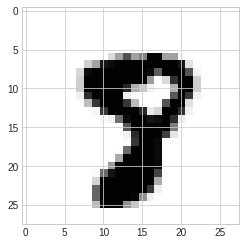

Classe predita: [9] rótulo: 7 Score:  0.49507323


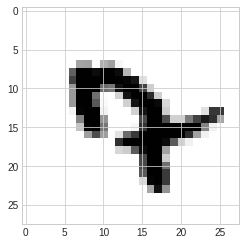

Classe predita: [9] rótulo: 8 Score:  0.62608933


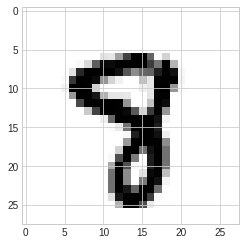

Classe predita: [3] rótulo: 7 Score:  0.36128834


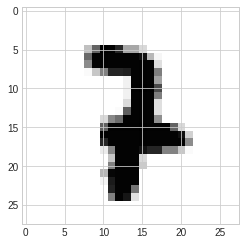

Classe predita: [3] rótulo: 2 Score:  0.90345716


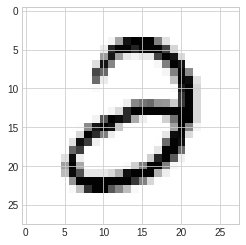

Classe predita: [9] rótulo: 7 Score:  0.994338


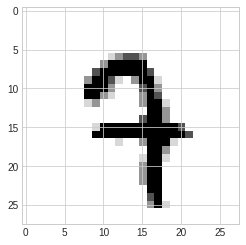

Classe predita: [9] rótulo: 5 Score:  0.4952906


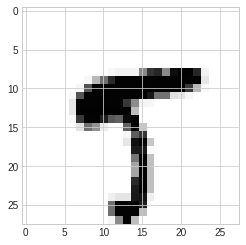

Classe predita: [9] rótulo: 7 Score:  0.79598725


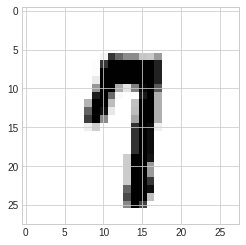

Classe predita: [6] rótulo: 2 Score:  0.53300124


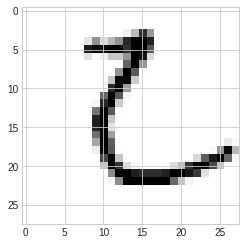

Classe predita: [9] rótulo: 4 Score:  0.7752743


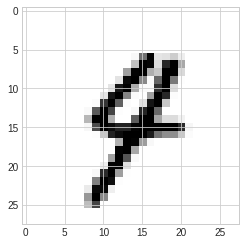

Classe predita: [7] rótulo: 2 Score:  0.51309925


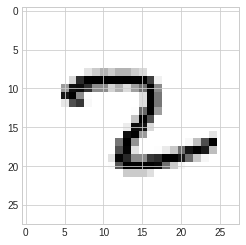

Classe predita: [1] rótulo: 2 Score:  0.5551482


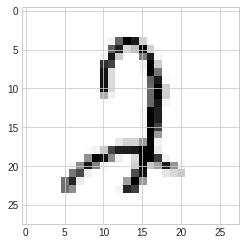

Classe predita: [7] rótulo: 2 Score:  0.76170725


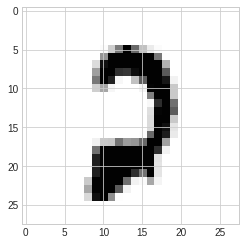

Classe predita: [4] rótulo: 6 Score:  0.9923625


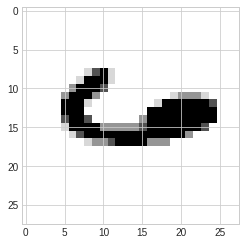

Classe predita: [9] rótulo: 4 Score:  0.9145959


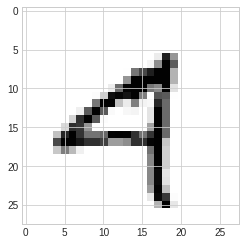

Classe predita: [0] rótulo: 5 Score:  0.86397064


KeyboardInterrupt: ignored

In [18]:
# Plotando os erros do modelo carregado
from matplotlib import pyplot as plt

rotulos=np.argmax(y_test, axis=1)

for i in range(len(x_test)):
  exemplo=x_test[i]
  exemplo = exemplo.reshape(1, 28, 28, 1)
  saida=cnn_model.predict(exemplo)
  classe=np.argmax(saida, axis=1)
  if (classe == rotulos[i]):
    continue
  print("Classe predita:", classe, "rótulo:", rotulos[i], "Score: ", np.max(saida))
  exemplo = exemplo.reshape(28, 28)
  plt.imshow(exemplo, interpolation='nearest')
  plt.show()

